# Suicide Rate Via EDA, Visualization and Models training

The goal of this notebook is to use Machine Learning models to predict suicide rates and conduct an analysis to identify factors that are correlated to a global rise in suicide rates.

The steps:
  1. Loading the data.
  2. Exploring the data.
  3. Visualizing the data.
  4. Data Preprocessing & EDA.
  5. Splitting the data
  6. Training the data
  7. Model Performance Comparision
  8. Statistical Tests
  9. Conclusion

#### Importing libraries

In [1]:
#importing libraries
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

#### Importing sklearn libraries

In [2]:
from pandas.plotting import scatter_matrix
from sklearn.ensemble import BaggingRegressor
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

## 1.Loading Data

In [3]:
data = pd.read_csv("suicide_data.csv")
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


## 2. Exploring the data

In [4]:
data.shape

(27820, 12)

In [5]:
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [6]:
#Renaming the columns names for convinience

data.columns = ['country', 'year', 'gender', 'age_group', 'suicide_count', 'population', 'suicide_rate', 'country-year', 'HDI for year',
                'gdp_for_year', 'gdp_per_capita', 'generation']
data.columns

Index(['country', 'year', 'gender', 'age_group', 'suicide_count', 'population',
       'suicide_rate', 'country-year', 'HDI for year', 'gdp_for_year',
       'gdp_per_capita', 'generation'],
      dtype='object')

In [7]:
#Information about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         27820 non-null  object 
 1   year            27820 non-null  int64  
 2   gender          27820 non-null  object 
 3   age_group       27820 non-null  object 
 4   suicide_count   27820 non-null  int64  
 5   population      27820 non-null  int64  
 6   suicide_rate    27820 non-null  float64
 7   country-year    27820 non-null  object 
 8   HDI for year    8364 non-null   float64
 9   gdp_for_year    27820 non-null  object 
 10  gdp_per_capita  27820 non-null  int64  
 11  generation      27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [8]:
data.age_group.value_counts()

age_group
15-24 years    4642
35-54 years    4642
75+ years      4642
25-34 years    4642
55-74 years    4642
5-14 years     4610
Name: count, dtype: int64

In [9]:
data.generation.value_counts()

generation
Generation X       6408
Silent             6364
Millenials         5844
Boomers            4990
G.I. Generation    2744
Generation Z       1470
Name: count, dtype: int64

#### Observations:
1. HDI for year column has missing values. 
2. there are  6 age groups.
3. There are 6 types of generations.


In [10]:
#Listing countries

country = data.country.unique()
print("Number of countries:", len(country))

Number of countries: 101


## 3. Visualizing the data:

array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'suicide_count'}>],
       [<Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'suicide_rate'}>],
       [<Axes: title={'center': 'HDI for year'}>,
        <Axes: title={'center': 'gdp_per_capita'}>]], dtype=object)

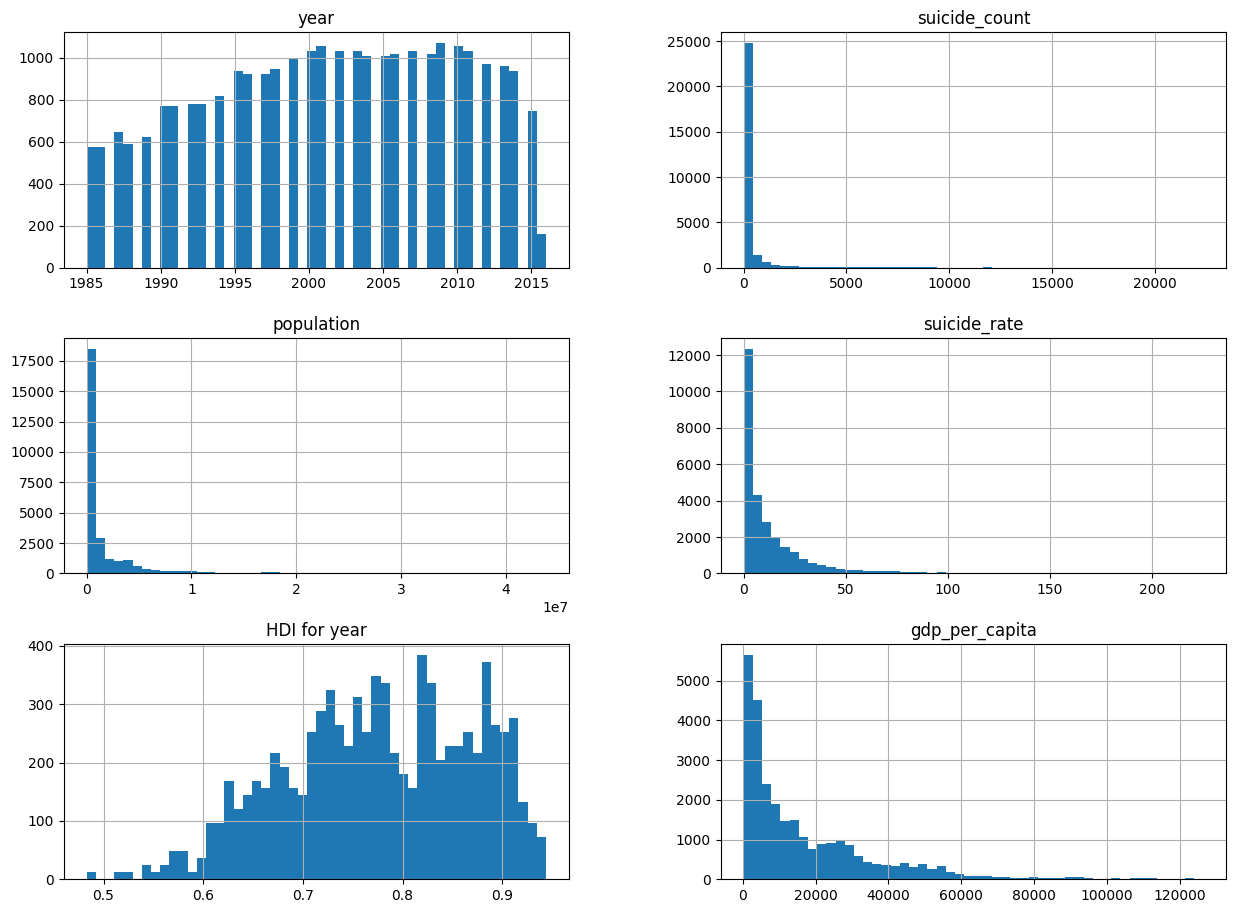

In [11]:
data.hist(bins = 50,figsize = (15,11))

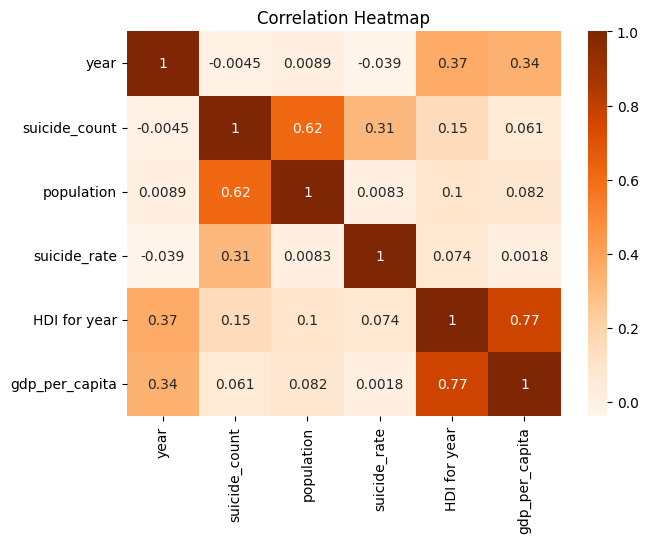

In [12]:
# Select only numeric columns
numeric_data = data.select_dtypes(include='number')

plt.figure(figsize=(7, 5))
sns.heatmap(numeric_data.corr(), annot=True, cmap='Oranges')
plt.title('Correlation Heatmap')
plt.show()

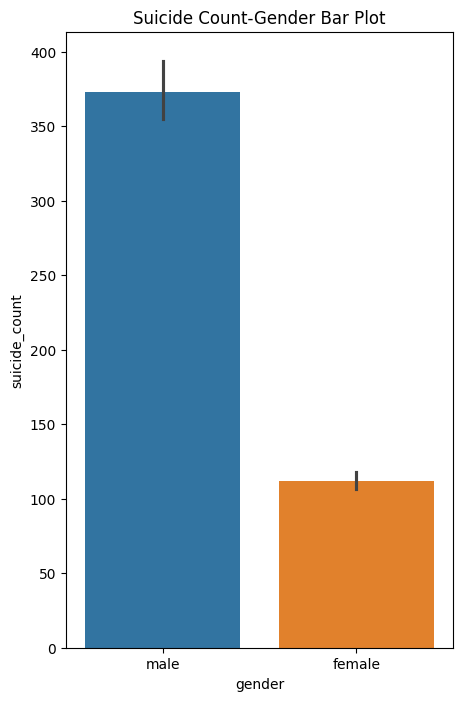

In [13]:
#Gender and suicide count bar plot

plt.figure(figsize=(5,8))
sns.barplot(x = "gender", y = "suicide_count", hue = "gender", data = data)
plt.title('Suicide Count-Gender Bar Plot')
plt.show()

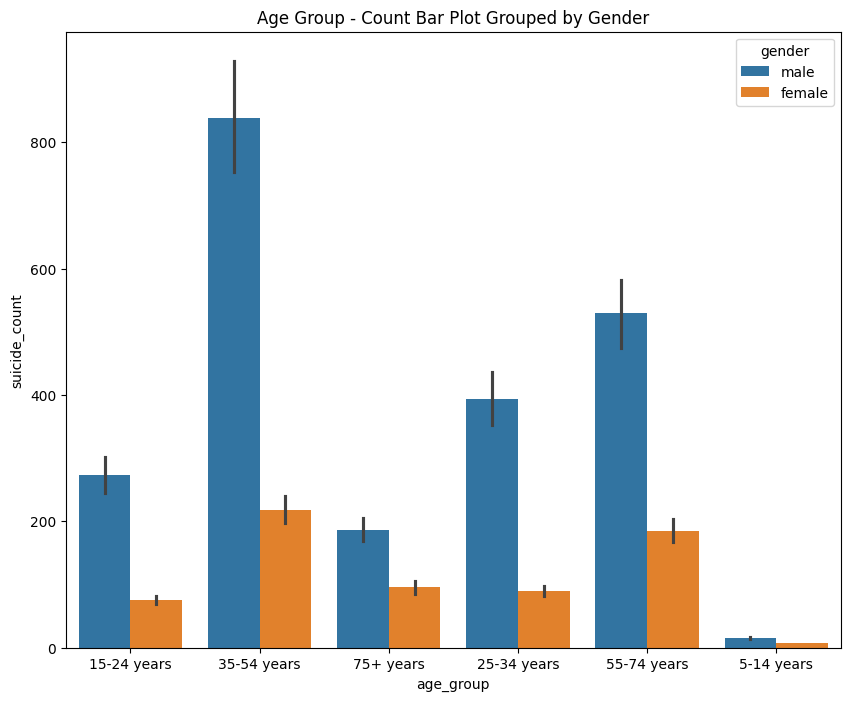

In [14]:
#Age Group - Count Bar Plot Grouped by Gender

plt.figure(figsize=(10,8))
sns.barplot(x = "age_group", y = "suicide_count", hue = "gender", data = data)
plt.title("Age Group - Count Bar Plot Grouped by Gender")
plt.show()

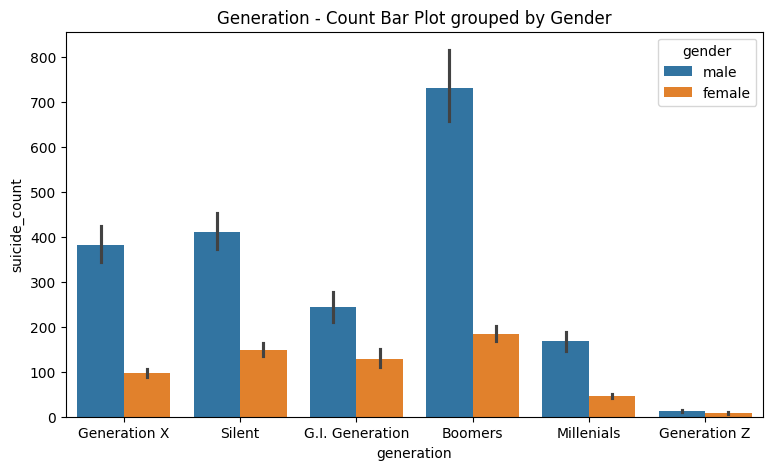

In [15]:
#Generation - Count Bar Plot grouped by Gender

plt.figure(figsize=(9,5))
sns.barplot(x = "generation", y = "suicide_count", hue = "gender", data = data)
plt.title('Generation - Count Bar Plot grouped by Gender')
plt.show()

#### The two bar plots above clearly indicate that the suicide is significantly higher in men than in women, regardless of their age group or generation.

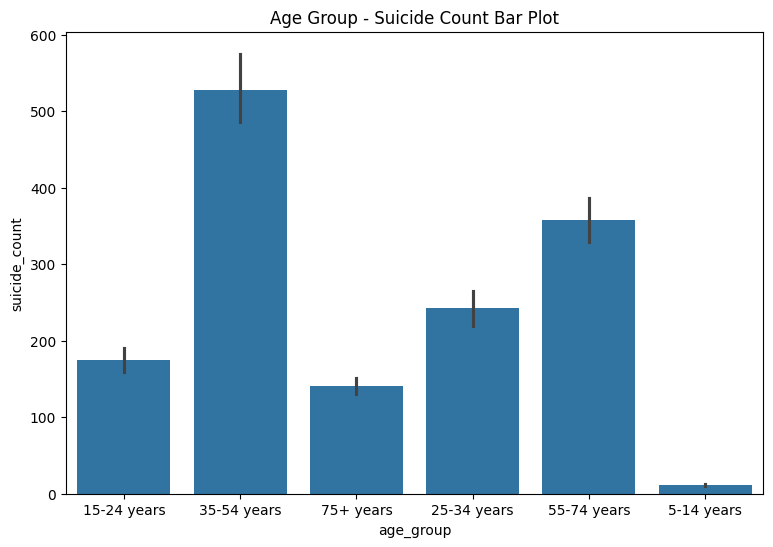

In [16]:
# Age Group and Suicide count bar plot

plt.figure(figsize=(9,6))
sns.barplot(x='age_group', y='suicide_count', data = data)
plt.title('Age Group - Suicide Count Bar Plot')
plt.show()

The above barplot shows that the suicide cases are more in the age group of 35-54 years followed by 55- 74 years.

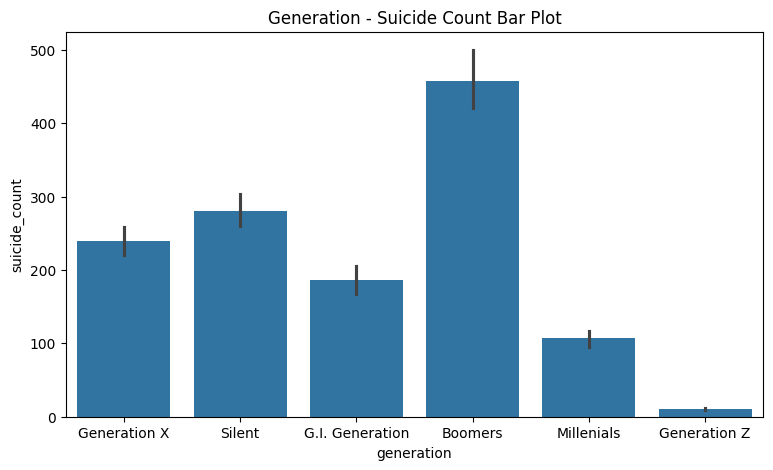

In [17]:
#Generation & Suicide Count Bar Plot

plt.figure(figsize=(9,5))
sns.barplot(x='generation', y='suicide_count',data=data)
plt.title('Generation - Suicide Count Bar Plot')
plt.show()

The above boxplot shows that the suicide cases are more in the boomers, silent and X generations. These generations are made up of people born until 1976.


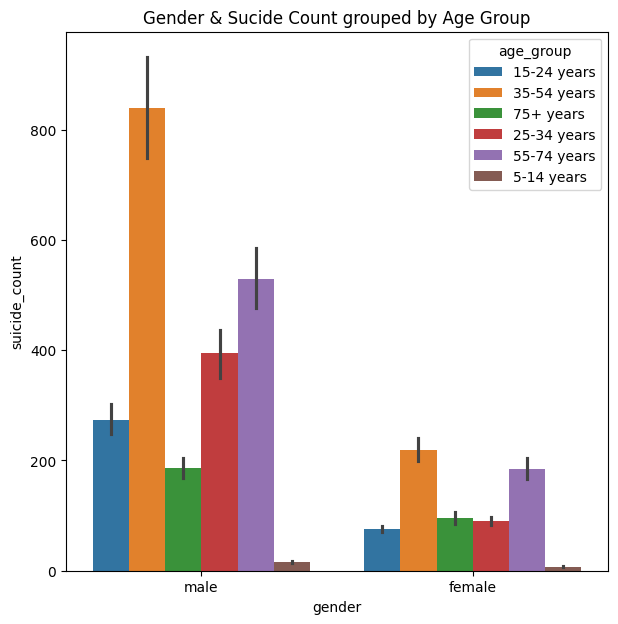

In [18]:
#Gender & Sucide Count grouped by Age Group bar plot

plt.figure(figsize=(7,7))
sns.barplot(x="gender", y="suicide_count", hue="age_group", data=data)
plt.title('Gender & Sucide Count grouped by Age Group')
plt.show()

1. The graph above shows that the age group of 35-54 years is more susceptible to suicides, regardless of gender, followed by the 55-74 years age group.
2. Males tend to commit suicide more than female.

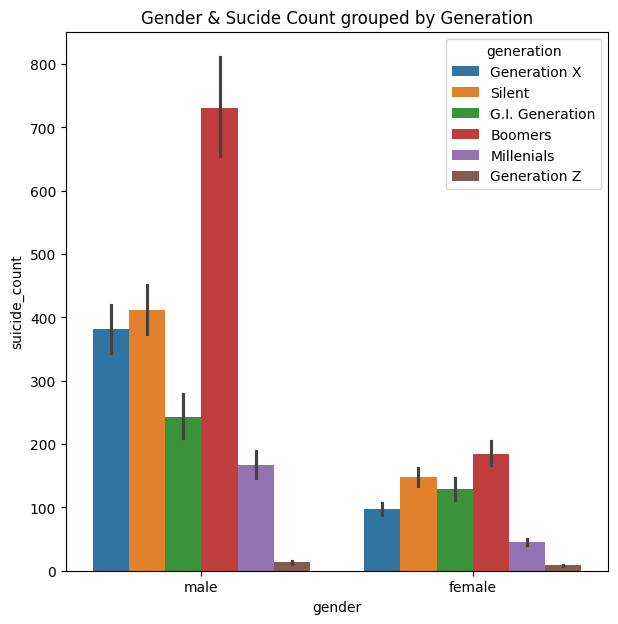

In [19]:
#Gender & Sucide Count grouped by Generation bar plot

plt.figure(figsize=(7,7))
sns.barplot(x="gender", y="suicide_count", hue="generation", data=data)
plt.title('Gender & Sucide Count grouped by Generation')
plt.show()


1. The Bloomers generation had more suicide cases followed by Silent generation.

<Axes: xlabel='year'>

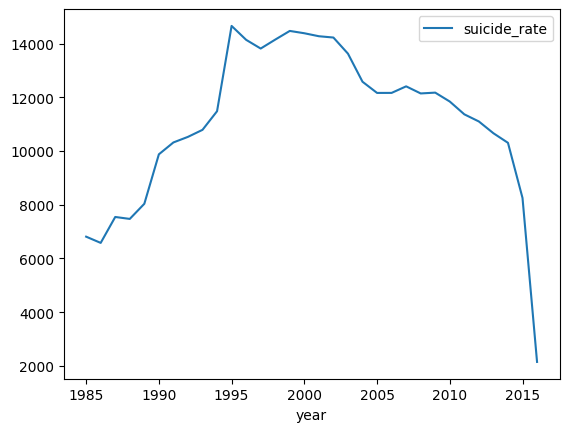

In [20]:
#Line plpot of year and suicide_rate

data[['year','suicide_rate']].groupby(['year']).sum().plot()

The observations from the above plot indicate that there was a rapid increase in the suicide rate starting from the year 1990, and a significant decrease in the suicide rate in the year 2016.

<Figure size 2000x1000 with 0 Axes>

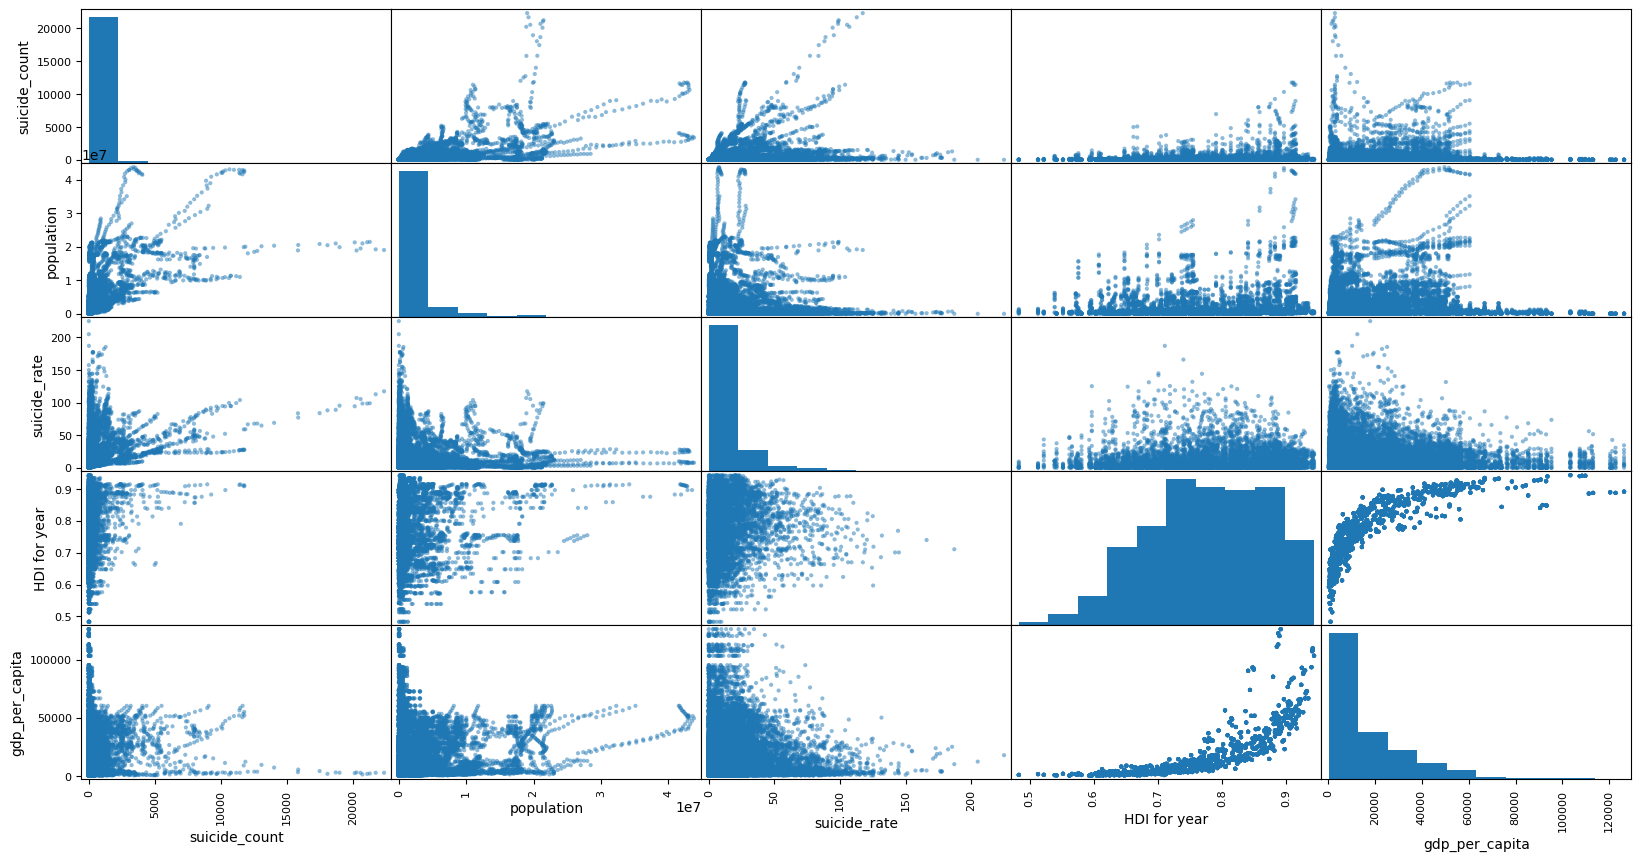

In [21]:
#Scatter matrix for checking outlier

plt.figure(figsize=(20,10))
attributes = ['suicide_count', 'population', 'suicide_rate','HDI for year', 
              'gdp_for_year','gdp_per_capita']
scatter_matrix(data[attributes], figsize=(20,10))
plt.show()

## 4. Data Preprocessing & EDA:

In [22]:
##checking the data for unique values

data.nunique()

country             101
year                 32
gender                2
age_group             6
suicide_count      2084
population        25564
suicide_rate       5298
country-year       2321
HDI for year        305
gdp_for_year       2321
gdp_per_capita     2233
generation            6
dtype: int64

In [23]:
#checking the data for null or missing values

data.isnull().sum()

country               0
year                  0
gender                0
age_group             0
suicide_count         0
population            0
suicide_rate          0
country-year          0
HDI for year      19456
gdp_for_year          0
gdp_per_capita        0
generation            0
dtype: int64

The column HDI for year has 19456 null values out of 27820 samples which is approximately 70% of the column.
To deal with this i chose to drop the column from the dataset.

In [24]:
#dropping the HDI for year column

data = data.drop(['HDI for year'], axis = 1)
data.shape


(27820, 11)

In [25]:
data.columns

Index(['country', 'year', 'gender', 'age_group', 'suicide_count', 'population',
       'suicide_rate', 'country-year', 'gdp_for_year', 'gdp_per_capita',
       'generation'],
      dtype='object')

The column country-year is just a combination of country and year columns. So dropping that column.

In [26]:
#dropping the country-year for year column

data = data.drop(['country-year'], axis = 1)

In [27]:
#checking for outlier and removing it

data=data.sort_values(by=["suicide_rate"])
q1=data["suicide_rate"].quantile(0.25)
q3=data["suicide_rate"].quantile(0.75)
iqr=q3-q1
lwo=q1-1.5*iqr
upo=q3+1.5*iqr
data=data[(data.suicide_rate<upo)&(data.suicide_rate>lwo)]
data=data.sort_index().reset_index(drop=True)
data.shape

(25774, 10)

In [28]:
#creating a copy of dataset for statistical test
stat_data = data.copy()
stat_data

,country,year,gender,age_group,suicide_count,population,suicide_rate,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...
25769,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,"63,067,077,179",2309,Generation X
25770,Uzbekistan,2014,female,75+ years,9,348465,2.58,"63,067,077,179",2309,Silent
25771,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,"63,067,077,179",2309,Generation Z
25772,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,"63,067,077,179",2309,Generation Z


In [29]:
#encoding the categorical features with LabelEncoder
file = open('label.pkl', 'wb')
categorical = ['country','year','age_group', 'gender', 'generation']
dict= {}

for column in categorical:
    le = LabelEncoder()
    le.fit(stat_data[column])
    # dump information to that file
    dict[column] = le
    stat_data[column] = le.transform(stat_data[column])
pickle.dump(dict, file)
file.close()

converting non-numerical labeled columns (country, year, gender, age_group and generation) are to be converted to numerical labels.

In [30]:
file = open('label.pkl', "rb")
label = pickle.load(file)
label

{'country': LabelEncoder(),
 'year': LabelEncoder(),
 'age_group': LabelEncoder(),
 'gender': LabelEncoder(),
 'generation': LabelEncoder()}

In [31]:
stat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25774 entries, 0 to 25773
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         25774 non-null  int32  
 1   year            25774 non-null  int64  
 2   gender          25774 non-null  int32  
 3   age_group       25774 non-null  int32  
 4   suicide_count   25774 non-null  int64  
 5   population      25774 non-null  int64  
 6   suicide_rate    25774 non-null  float64
 7   gdp_for_year    25774 non-null  object 
 8   gdp_per_capita  25774 non-null  int64  
 9   generation      25774 non-null  int32  
dtypes: float64(1), int32(4), int64(4), object(1)
memory usage: 1.6+ MB


In [32]:
stat_data.dtypes

country             int32
year                int64
gender              int32
age_group           int32
suicide_count       int64
population          int64
suicide_rate      float64
gdp_for_year       object
gdp_per_capita      int64
generation          int32
dtype: object

In [33]:
# Converting the column 'gdp_for_year' to float from object

stat_data['gdp_for_year'] = stat_data['gdp_for_year'].str.replace(',','').astype(float)

Normalization

In [34]:
#description of dataset

stat_data.describe().T

,count,mean,std,min,25%,50%,75%,max
country,25774.0,4.900237e+01,2.949350e+01,0.0,2.300000e+01,4.700000e+01,7.400000e+01,1.000000e+02
year,25774.0,1.630973e+01,8.505488e+00,0.0,1.000000e+01,1.700000e+01,2.400000e+01,3.100000e+01
gender,25774.0,4.630636e-01,4.986435e-01,0.0,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
age_group,25774.0,2.408318e+00,1.682575e+00,0.0,1.000000e+00,2.000000e+00,4.000000e+00,5.000000e+00
suicide_count,25774.0,1.777423e+02,5.933664e+02,0.0,2.000000e+00,2.000000e+01,1.050000e+02,1.176700e+04
population,25774.0,1.854543e+06,3.934928e+06,278.0,9.704875e+04,4.411165e+05,1.507493e+06,4.380521e+07
suicide_rate,25774.0,8.547500e+00,9.613651e+00,0.0,7.100000e-01,4.990000e+00,1.328000e+01,4.016000e+01
gdp_for_year,25774.0,4.475355e+11,1.477638e+12,46919625.0,8.680472e+09,4.811469e+10,2.620076e+11,1.812071e+13
gdp_per_capita,25774.0,1.710801e+04,1.914534e+04,251.0,3.492000e+03,9.456000e+03,2.519100e+04,1.263520e+05
generation,25774.0,2.705207e+00,1.787342e+00,0.0,1.000000e+00,2.000000e+00,4.000000e+00,5.000000e+00


In [35]:
#Scaling the numerical data columns with RobustScalar

numerical = ['suicide_count', 'population', 'gdp_for_year','gdp_per_capita']



rc = RobustScaler()
stat_data[numerical] = rc.fit_transform(stat_data[numerical])


In [36]:

pickle.dump(rc, open('robust.pkl', "wb"))

In [37]:
# Sepratating & assigning features and target columns to X & y

y = stat_data['suicide_rate']
X = stat_data.drop('suicide_rate',axis=1)
X.shape, y.shape

((25774, 9), (25774,))

## 5. Splitting the Data:

In [38]:
# Splitting the dataset into train and test sets: 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 42)

## 6. Model Training:
1. Linear Regression
2. Decision Tree
3. Random Forest
4. Gradient Boosting
5. Bagging Regression


In [39]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []
rmse_train = []
rmse_test = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))
  rmse_train.append(round(c, 3))
  rmse_test.append(round(d, 3))

## 6.1. Linear Regression

In [40]:
# Linear regression model 


# instantiate the model
lr = LinearRegression()
# fit the model 
lr.fit(X_train, y_train)

LinearRegression()

In [41]:
#predicting the target value from the model for the samples
y_test_lr = lr.predict(X_test)
y_train_lr = lr.predict(X_train)

#### Performance Evaluation:

In [42]:
#computing the accuracy of the model performance
acc_train_lr = lr.score(X_train, y_train)
acc_test_lr = lr.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_lr = np.sqrt(mean_squared_error(y_train, y_train_lr))
rmse_test_lr = np.sqrt(mean_squared_error(y_test, y_test_lr))

print("Linear Regression: Accuracy on training Data: {:.3f}".format(acc_train_lr))
print("Linear Regression: Accuracy on test Data: {:.3f}".format(acc_test_lr))
print('\nLinear Regression: The RMSE of the training set is:', rmse_train_lr)
print('Linear Regression: The RMSE of the testing set is:', rmse_test_lr)
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Linear Regression', acc_train_lr, acc_test_lr, rmse_train_lr, rmse_test_lr)

Linear Regression: Accuracy on training Data: 0.284
Linear Regression: Accuracy on test Data: 0.274

Linear Regression: The RMSE of the training set is: 8.17862820769805
Linear Regression: The RMSE of the testing set is: 8.005812687898015


Text(0.5, 1.0, 'Actual vs Predicted Training Set')

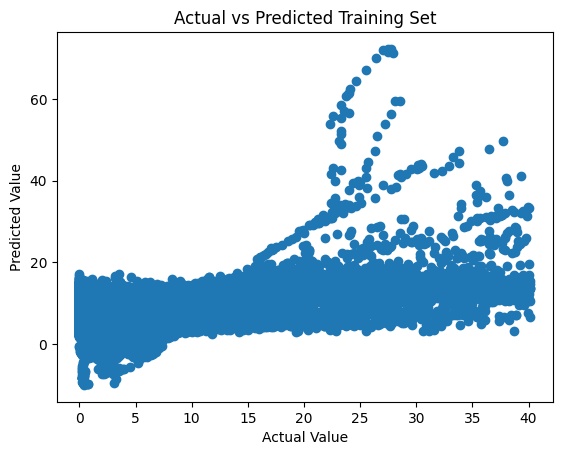

In [43]:
plt.scatter(y_train,y_train_lr)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Actual vs Predicted Training Set")

Text(0.5, 1.0, 'Actual vs Predicted Testing Set')

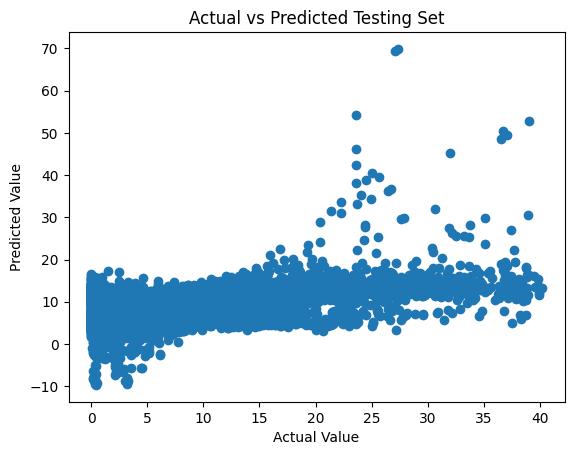

In [44]:
plt.scatter(y_test,y_test_lr)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Actual vs Predicted Testing Set")

#### OBSERVATIONS: 
   The model preformance is not very good, but we can see that the scores on the training and test sets are very close together. This means we are likely underfitting, not overfitting.


## 6.2. Decision Trees:

In [45]:
# Decision Tree regression model 


# instantiate the model 
tree = DecisionTreeRegressor(max_depth=9)
# fit the model 
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=9)

In [46]:
#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

In [47]:
#computing the accuracy of the model performance
acc_train_tree = tree.score(X_train, y_train)
acc_test_tree = tree.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_tree = np.sqrt(mean_squared_error(y_train, y_train_tree))
rmse_test_tree = np.sqrt(mean_squared_error(y_test, y_test_tree))

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))
print('\nDecision Tree: The RMSE of the training set is:', rmse_train_tree)
print('Decision Tree: The RMSE of the testing set is:', rmse_test_tree)
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Decision Tree',acc_train_tree, acc_test_tree, rmse_train_tree, rmse_test_tree)

Decision Tree: Accuracy on training Data: 0.976
Decision Tree: Accuracy on test Data: 0.969

Decision Tree: The RMSE of the training set is: 1.49820960521051
Decision Tree: The RMSE of the testing set is: 1.65345509526106


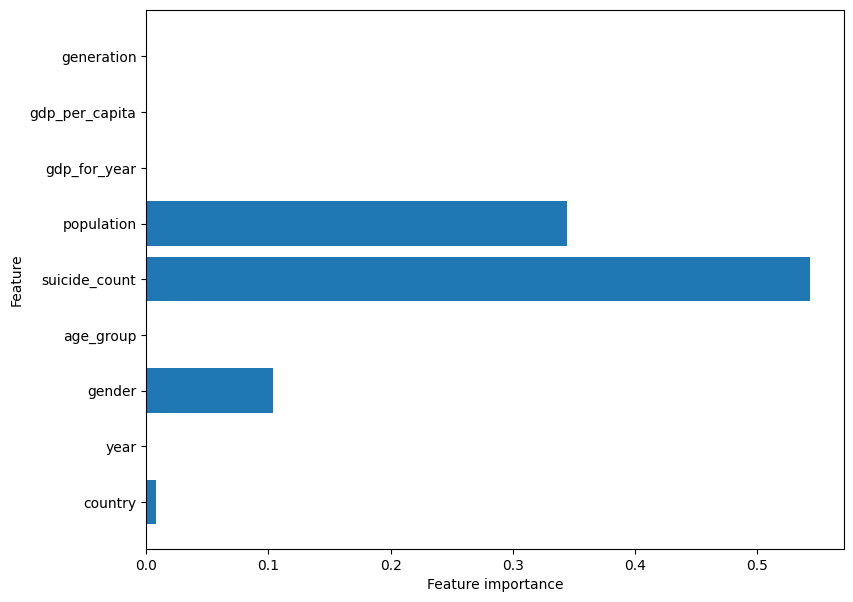

In [48]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

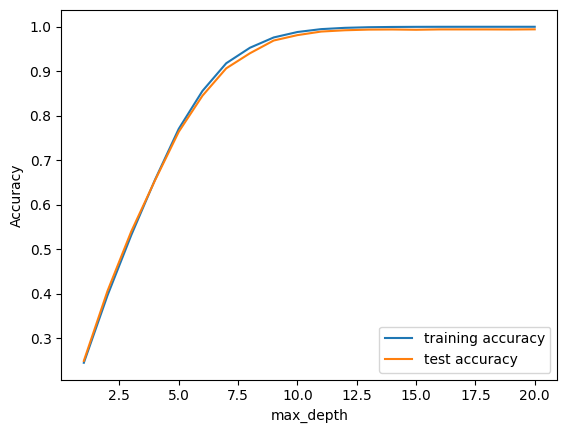

In [49]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1, 21)
for n in depth:
  # fit the model
  tree = DecisionTreeRegressor(max_depth=n)
  tree.fit(X_train, y_train)
  # record training set accuracy
  training_accuracy.append(tree.score(X_train, y_train))
  # record generalization accuracy
  test_accuracy.append(tree.score(X_test, y_test))

#plotting the training & testing accuracy for max_depth from 1 to 20
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend()

#### OBSERVATIONS:
Decision tree is better than other regression model as it gives 96.9% accuracy, also as max depth increases accuracy of model increases.

## 6.3. Random Forest:

In [50]:
# Random Forest regression model
# instantiate the model
forest = RandomForestRegressor(max_depth=9)

# fit the model 
forest.fit(X_train, y_train)

RandomForestRegressor(max_depth=9)

In [51]:
#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

In [52]:
acc_train_forest = forest.score(X_train, y_train)
acc_test_forest = forest.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_forest = np.sqrt(mean_squared_error(y_train, y_train_forest))
rmse_test_forest = np.sqrt(mean_squared_error(y_test, y_test_forest))

print("Random Forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random Forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))
print('\nRandom Forest: The RMSE of the training set is: ', rmse_train_forest)
print('Random Forest: The RMSE of the testing set is: ', rmse_test_forest)
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Random Forest',acc_train_forest, acc_test_forest, rmse_train_forest, rmse_test_forest)

Random Forest: Accuracy on training Data: 0.991
Random Forest: Accuracy on test Data: 0.988

Random Forest: The RMSE of the training set is:  0.8962969253969512
Random Forest: The RMSE of the testing set is:  1.048076670622036


In [53]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1, 21)
for n in depth:
  # fit the model
  forest = RandomForestRegressor(max_depth=n)
  forest.fit(X_train, y_train)
  # record training set accuracy
  training_accuracy.append(forest.score(X_train, y_train))
  # record generalization accuracy
  test_accuracy.append(forest.score(X_test, y_test))

#plotting the training & testing accuracy for max_depth from 1 to 20
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend()

#### OBSERVATIONS:
The random forest gives us an accuracy of 99.2%, better than the linear models or a single decision tree, without tuning any parameters. But this might also be a case of overfitting. So, the parameter are tuned and the finalized model has an accuracy of 98% which is better than the linear & decision tree models.

## 6.4. Gradient Boosted Regression Trees

In [ ]:
# Gradient Boosted Regression Trees model


# instantiate the model
gbrt = GradientBoostingRegressor(learning_rate=0.5)

# fit the model 
gbrt.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.5)

In [ ]:
#predicting the target value from the model for the samples
y_test_gbrt = gbrt.predict(X_test)
y_train_gbrt = gbrt.predict(X_train)

In [ ]:
#computing the accuracy of the model performance
acc_train_gbrt = gbrt.score(X_train, y_train)
acc_test_gbrt = gbrt.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_gbrt = np.sqrt(mean_squared_error(y_train, y_train_gbrt))
rmse_test_gbrt = np.sqrt(mean_squared_error(y_test, y_test_gbrt))

print("Gradient Boosted Regression Trees: Accuracy on training Data: {:.3f}".format(acc_train_gbrt))
print("Gradient Boosted Regression Trees: Accuracy on test Data: {:.3f}".format(acc_test_gbrt))
print('\nGradient Boosted Regression Trees: The RMSE of the training set is: ', rmse_train_gbrt)
print('Gradient Boosted Regression Trees: The RMSE of the testing set is: ', rmse_test_gbrt)

#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Gradient Boosted Regression',acc_train_gbrt, acc_test_gbrt, rmse_train_gbrt, rmse_test_gbrt)

Gradient Boosted Regression Trees: Accuracy on training Data: 0.991
Gradient Boosted Regression Trees: Accuracy on test Data: 0.988

Gradient Boosted Regression Trees: The RMSE of the training set is:  0.9247908152749484
Gradient Boosted Regression Trees: The RMSE of the testing set is:  1.0307082067128701


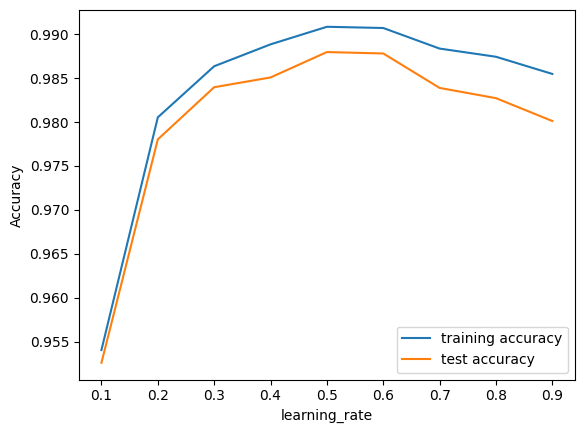

In [ ]:
training_accuracy = []
test_accuracy = []
r = []
# try learning_rate from 0.1 to 0.9
rate = range(1, 10)
for n in rate:
  # fit the model
  gbrt = GradientBoostingRegressor(learning_rate=n*0.1)
  gbrt.fit(X_train, y_train)
  r.append(n*0.1)
  # record training set accuracy
  training_accuracy.append(gbrt.score(X_train, y_train))
  # record generalization accuracy
  test_accuracy.append(gbrt.score(X_test, y_test))

#plotting the training & testing accuracy for learning_rate from 0.1 to 0.9
plt.plot(r, training_accuracy, label="training accuracy")
plt.plot(r, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("learning_rate")
plt.legend()

#### OBSERVATIONS:
The model didnt overfit when trained without tuning any parameters. The model accuracy obtained is 95.5%.

Hyper tuning is performed for Gradient Boosted Regression Tree model. The tuned parameters are learning_rate, n_estimators & max_depth. Even upon changing the n_estimators with the combination of other two, there is no change in the model performance.

So, the default value of n_estimators is taken and the other two parameters are tuned. The otimized Gradient Boosted model gives us an accuracy of 98.2%, with parameter tuning.

## 6.5. Bagging Regression:

In [ ]:
#Bagging Regression model


#instantiate the model
br = BaggingRegressor(n_estimators=10)

#fit the model
br.fit(X_train, y_train)

BaggingRegressor()

In [ ]:
#predicting the target value from the model for the samples
y_test_br = br.predict(X_test)
y_train_br = br.predict(X_train)

In [ ]:
#computing the accuracy of the model performance
acc_train_br = br.score(X_train, y_train)
acc_test_br = br.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_br = np.sqrt(mean_squared_error(y_train, y_train_br))
rmse_test_br = np.sqrt(mean_squared_error(y_test, y_test_br))

print("Bagging Regression: Accuracy on training Data: {:.3f}".format(acc_train_br))
print("Bagging Regression: Accuracy on test Data: {:.3f}".format(acc_test_br))
print('\nBagging Regression: The RMSE of the training set is: ', rmse_train_br)
print('Bagging Regression: The RMSE of the testing set is: ', rmse_test_br)
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Bagging Regression',acc_train_br, acc_test_br, rmse_train_br, rmse_test_br)


Bagging Regression: Accuracy on training Data: 0.999
Bagging Regression: Accuracy on test Data: 0.997

Bagging Regression: The RMSE of the training set is:  0.250118113036591
Bagging Regression: The RMSE of the testing set is:  0.5086598582612958


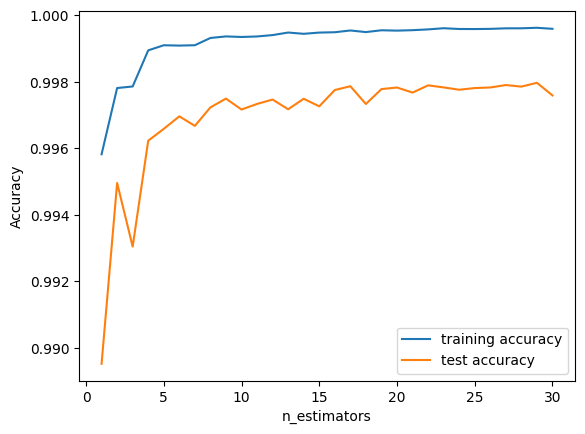

In [ ]:
training_accuracy = []
test_accuracy = []
# try n_estimators from 1 to 30
est = range(1, 31)
for n in est:
  # fit the model
  br = BaggingRegressor(n_estimators=n)
  br.fit(X_train, y_train)
  # record training set accuracy
  training_accuracy.append(br.score(X_train, y_train))
  # record generalization accuracy
  test_accuracy.append(br.score(X_test, y_test))

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.plot(est, training_accuracy, label="training accuracy")
plt.plot(est, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_estimators")
plt.legend()

#### OBSERVATIONS: 
From the above plot, it is clear that the model performs very well on this dataset. Even with tuning of n_estimators parameters, the training accuracy always stayed above 99.5% & the test data accuracy is always above 99%. This may or may not be the case of overfitting.

## 7. Comparision of Models:

In [ ]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test,
    'Train RMSE': rmse_train,
    'Test RMSE': rmse_test})

results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False).reset_index(drop=True)

,ML Model,Train Accuracy,Test Accuracy,Train RMSE,Test RMSE
0,Bagging Regression,0.999,0.997,0.250,0.509
1,Random Forest,0.991,0.988,0.916,1.050
2,Gradient Boosted Regression,0.991,0.988,0.925,1.031
3,Decision Tree,0.976,0.969,1.498,1.654
4,Linear Regression,0.284,0.274,8.179,8.006


#### OBSERVATIONS: 
Among all the trained models, Random Forest performance is better.

In [ ]:
# dump information to that file
pickle.dump(br, open('model.pkl', 'wb'))

## 8. Statistical Tests:


### 8.1. Test 1: Checking the difference in suicide rates between male and female
The hypothesis statements for this test are:

1. H0: There is no difference in the suicide rates among male and female (Null).
2. H1: There is difference in the suicide rates among male and female (Alternate)

In [ ]:
#collecting male suicide rate data
male = stat_data['suicide_rate'][stat_data['gender'] == 1]
print(male.size)
# male

11935


In [ ]:
#collecting female suicide rate data
female = stat_data['suicide_rate'][stat_data['gender'] == 0]
print(female.size)
# female

13839


In [ ]:
#calculating p value

ttest,pval = stats.ttest_rel(male[:11900], female[:11900])

if pval<0.05:
    print("Reject null hypothesis")
else:
    print("Accept null hypothesis")

Reject null hypothesis


#### Test Conclusion: 
the result obtained is to reject the null hypothesis. This means that there is different in suicide rates of male & female.

### 8.2. Test 2: the dependence of suicide rate on the age.
Using Chi- Square test, The hypothesis statements for this test are:
1. H0: Suicide rate and age are independent (Null).
2. H1: Suicide rate and age are dependent (Alternate).

In [ ]:
#Creating Contingency Table
contingency_table = pd.crosstab(stat_data.suicide_rate, stat_data.age_group)
#Significance Level 5%
alpha=0.05

chistat, p, dof, expected = stats.chi2_contingency(contingency_table )

#critical_value
critical_value=stats.chi2.ppf(q=1-alpha,df=dof)
print('critical_value:',critical_value)

critical_value: 18257.744744487307


In [ ]:
print('Degree of Freedom: ',dof)
print('chi-square statistic:',chistat)
print('critical_value:',critical_value)
print('p-value:',p) 

Degree of Freedom:  17945
chi-square statistic: 30342.74275521654
critical_value: 18257.744744487307
p-value: 0.0


In [ ]:
#compare chi_square_statistic with critical_value and p-value which is the 
 #probability of getting chi-square>0.09 (chi_square_statistic)
if chistat>=critical_value:
    print("Reject H0,There is a dependency between Age group & Suicide rate.")
else:
    print("Retain H0,There is no relationship between Age group & Suicide rate.")
    
if p<=alpha:
    print("Reject H0,There is a dependency between Age group & Suicide rate.")
else:
    print("Retain H0,There is no relationship between Age group & Suicide rate.")


Reject H0,There is a dependency between Age group & Suicide rate.
Reject H0,There is a dependency between Age group & Suicide rate.


#### Test Conclusion: 
By performing Chi- Square test, the result obtained is to reject the null hypothesis. This means that there is dependency between Age group & Suicide rate.

## 9. Conclusion:
The final conclusion on the suicide dataset are that the irrespective of age group and generation, male population are more prone to commit suicide than female.